# Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Importing the CSV data as pandas DataFrame

In [2]:
df= pd.read_csv(r"C:\Users\pulki\mlproject2\notebook\data\data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shape of the dataset

In [3]:
df.shape

(7043, 21)

# Dataset Information

- customerID: unique identifier assigned to each customer

- gender: gender of the customer (Male, Female)

- SeniorCitizen: indicates whether the customer is a senior citizen

- 1 = Yes

- 0 = No

- Partner: whether the customer has a partner (Yes, No)

- Dependents: whether the customer has dependents (Yes, No)

- tenure: number of months the customer has stayed with the company

- PhoneService: whether the customer has a phone service (Yes, No)

- MultipleLines: whether the customer has multiple phone lines

- (Yes, No, No phone service)

- InternetService: type of internet service used by the customer (DSL, Fiber optic, No)

- OnlineSecurity: whether the customer has online security add-on (Yes, No, No internet service)

- OnlineBackup: whether the customer has online backup service (Yes, No, No internet service)

- DeviceProtection: whether the customer has device protection (Yes, No, No internet service)

- TechSupport: whether the customer has technical support (Yes, No, No internet service)

- StreamingTV: whether the customer uses streaming TV service (Yes, No, No internet service)

- StreamingMovies: whether the customer uses streaming movies service (Yes, No, No internet service)

- Contract: type of contract the customer has

- (Month-to-month, One year, Two year)

- PaperlessBilling: whether the customer uses paperless billing (Yes, No)

- PaymentMethod: payment method used by the customer

- (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- MonthlyCharges: monthly amount charged to the customer

- TotalCharges: total amount charged to the customer over the entire tenure

- Churn (Target Variable): whether the customer has left the company

- Yes = Customer churned

- No = Customer retained

# Data Cleaning
1. Checking missing values

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values found in our dataset

2. Checking the dataset's statistics

In [5]:
df.describe(include= 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


3. Checking the data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No non-null values found

4. Checking duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

5. Checking the unique values of dataset

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

6. Names of columns in the dataset

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

7. Removing the unnecessary column

In [10]:
df.drop(columns= ['customerID'], inplace= True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print("Categories in 'gender':", df['gender'].unique())

print("Categories in 'SeniorCitizen':", df['SeniorCitizen'].unique())

print("Categories in 'Partner':", df['Partner'].unique())

print("Categories in 'Dependents':", df['Dependents'].unique())

print("Categories in 'InternetService':", df['InternetService'].unique())

print("Categories in 'Contract':", df['Contract'].unique())

print("Categories in 'PaperlessBilling':", df['PaperlessBilling'].unique())

print("Categories in 'PaymentMethod':", df['PaymentMethod'].unique())

print("Categories in 'Churn' (Target):", df['Churn'].unique())


Categories in 'gender': ['Female' 'Male']
Categories in 'SeniorCitizen': [0 1]
Categories in 'Partner': ['Yes' 'No']
Categories in 'Dependents': ['No' 'Yes']
Categories in 'InternetService': ['DSL' 'Fiber optic' 'No']
Categories in 'Contract': ['Month-to-month' 'One year' 'Two year']
Categories in 'PaperlessBilling': ['Yes' 'No']
Categories in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Categories in 'Churn' (Target): ['No' 'Yes']


8. Defining the Numerical and Categorical Features

In [13]:
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

#printing numerical and categorical features
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
We have 17 categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


9. Fixing Total Charges

In [14]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Target Variable Analysis ('Churn')

In [16]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

There are 5174 'No' and 1869 'Yes' in the column 'Churn'

In [17]:
df['Churn'].value_counts(normalize= True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

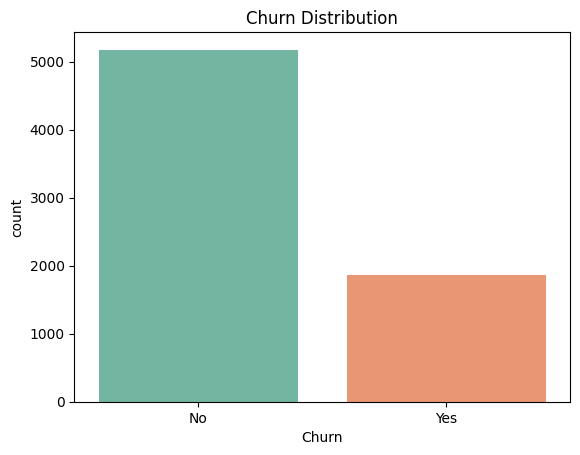

In [18]:
sns.countplot(x= 'Churn', data= df, palette= 'Set2')
plt.title('Churn Distribution')
plt.show()

# Feature Analysis with Plots
1. Numerical Feature Analysis

In [19]:
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']

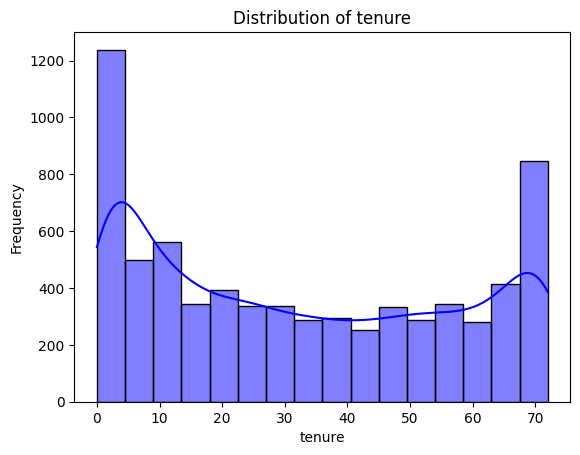

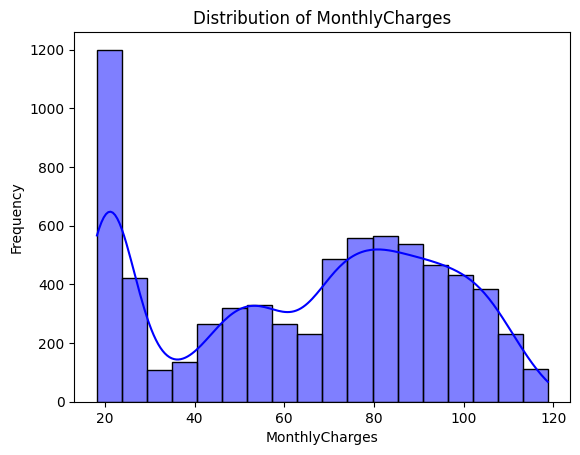

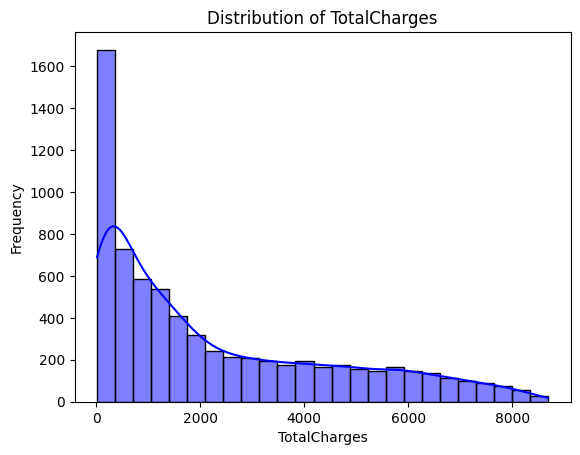

In [20]:
for col in num_cols:
    plt.figsize= (8,4)
    sns.histplot(df[col], kde=  True, color= 'blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

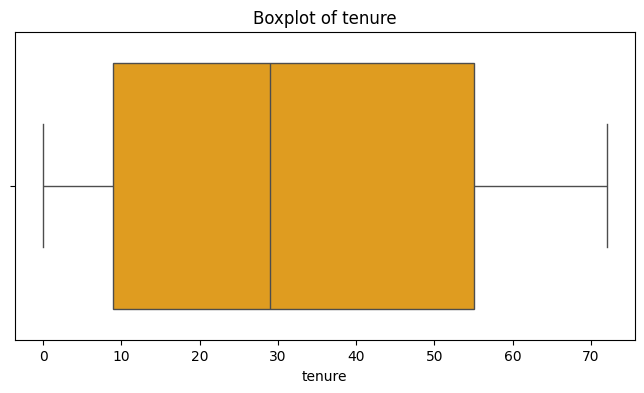

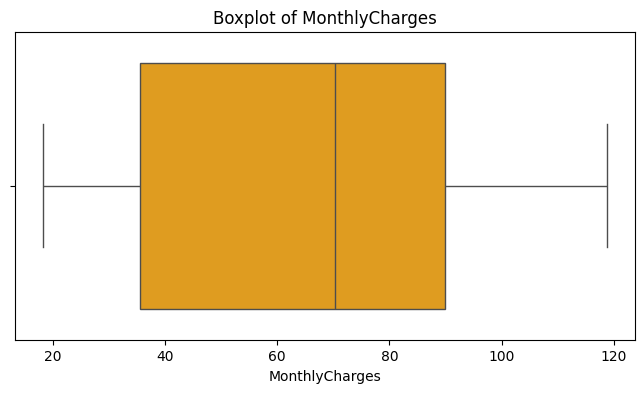

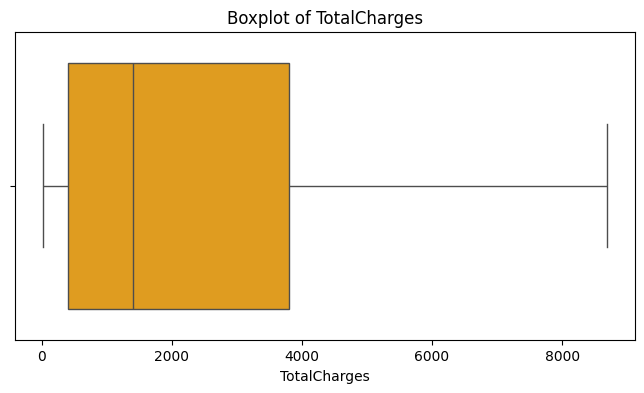

In [21]:
for col in num_cols:
    plt.figure(figsize= (8,4))
    sns.boxplot(x= df[col], color= 'orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

2. Categorical Feature Analysis

In [22]:
cat_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'InternetService',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

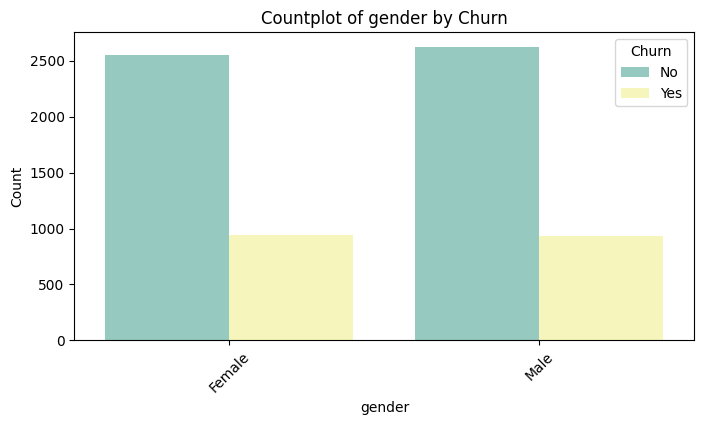

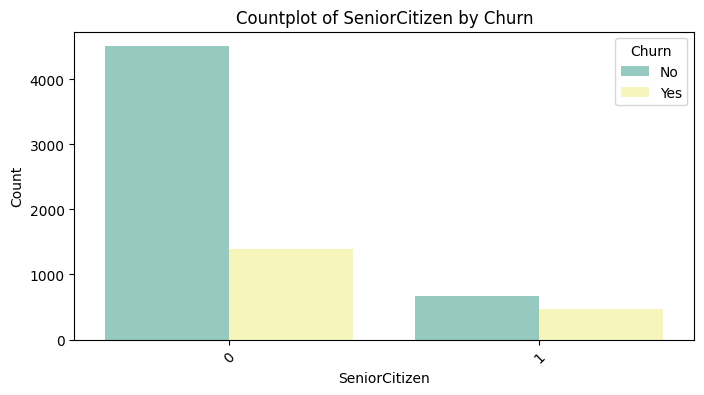

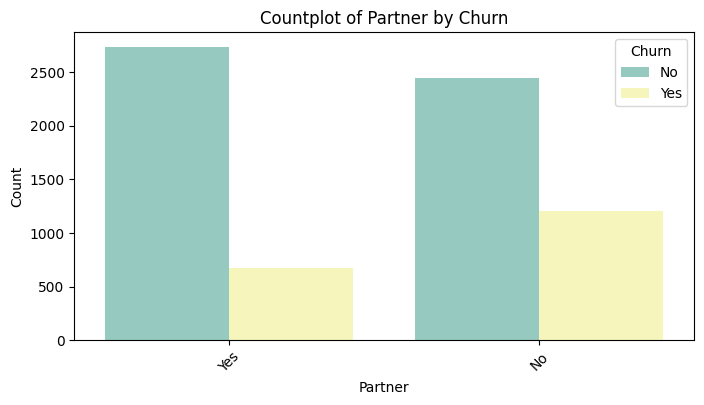

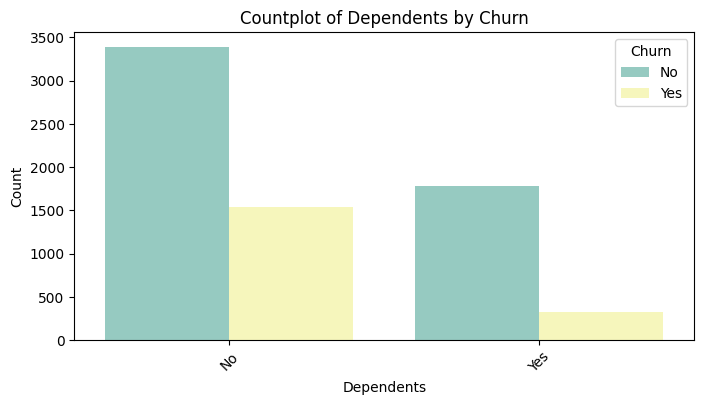

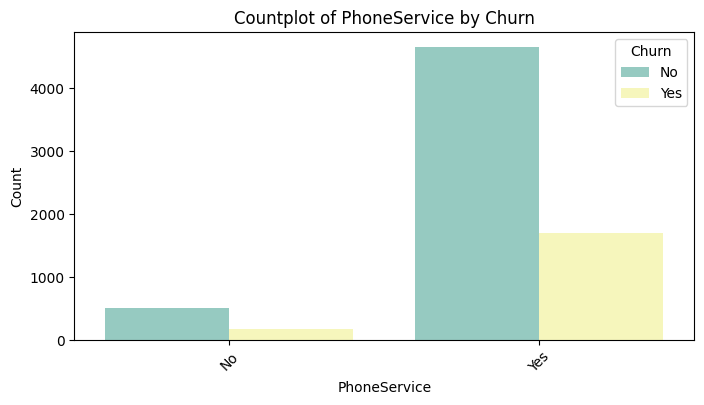

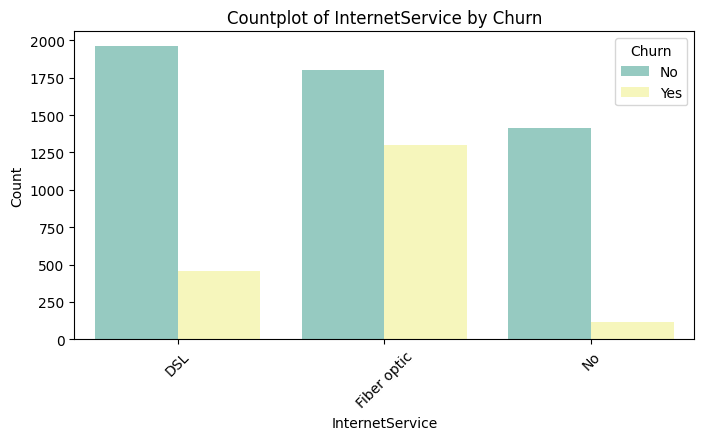

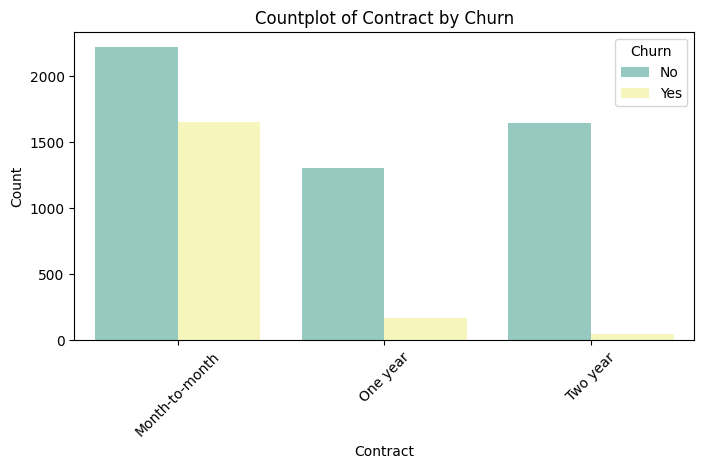

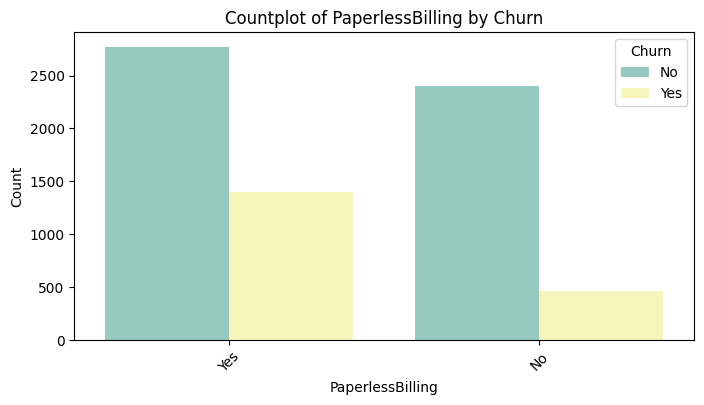

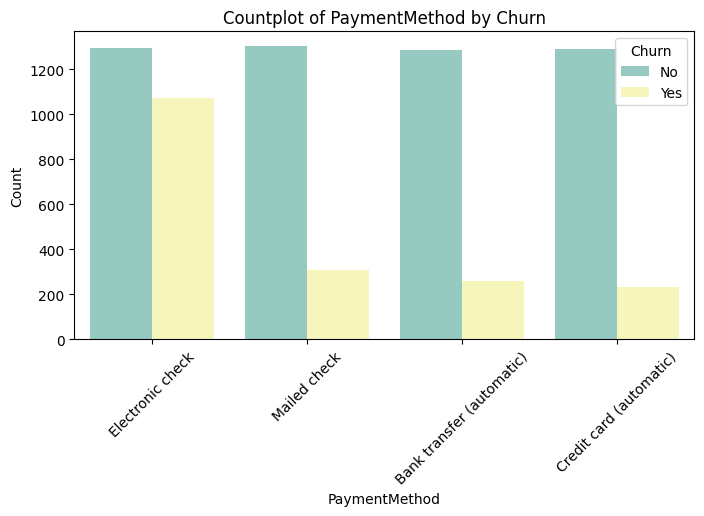

In [23]:
for col  in cat_cols:
    plt.figure(figsize= (8,4))
    sns.countplot(x= df[col], hue= df['Churn'], palette= 'Set3')
    plt.title(f'Countplot of {col} by Churn')
    plt.xticks(rotation= 45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis

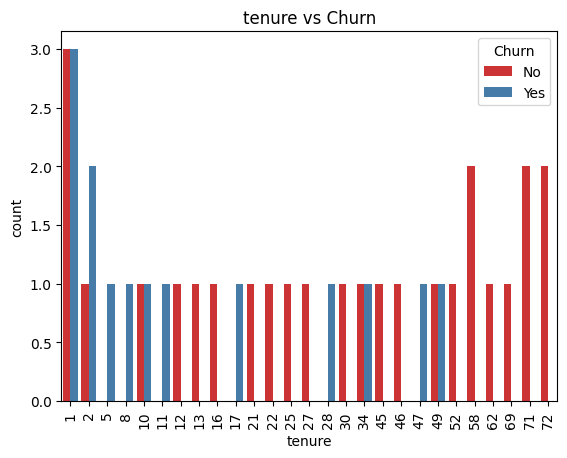

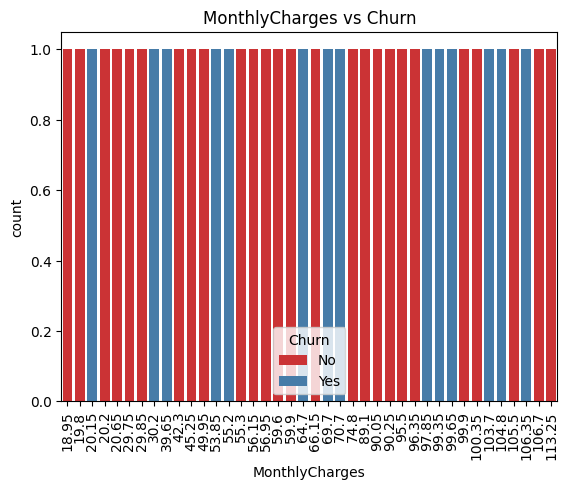

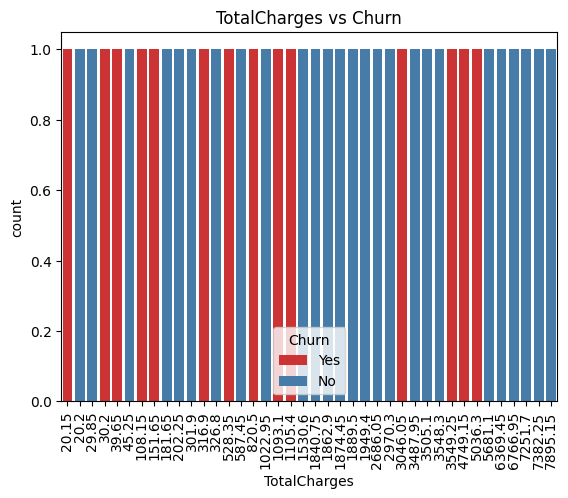

In [24]:
for col in num_cols:
    sns.countplot(x= col, hue= 'Churn', data= df.head(40), palette= 'Set1')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation= 90)
    plt.show()

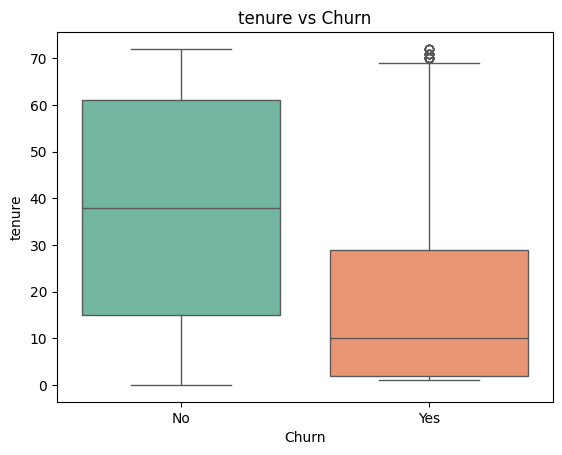

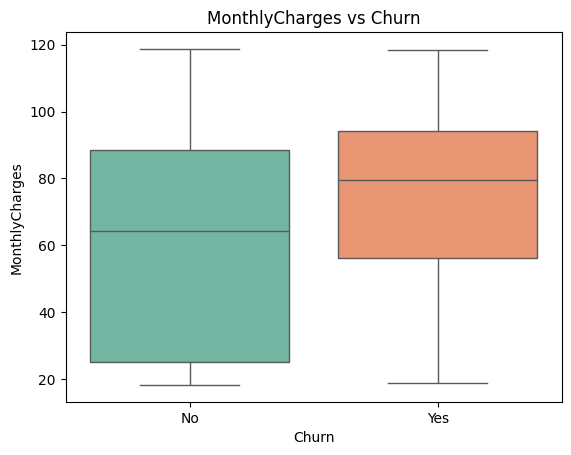

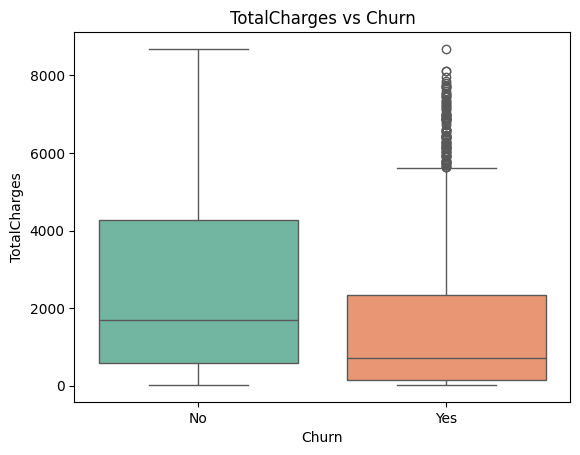

In [25]:
for col in num_cols:
    sns.boxplot(x= 'Churn', y= col, data= df, palette= 'Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.show()

- Correlation

In [26]:
corr= df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


Above is the correlation of the nums_cols with one another

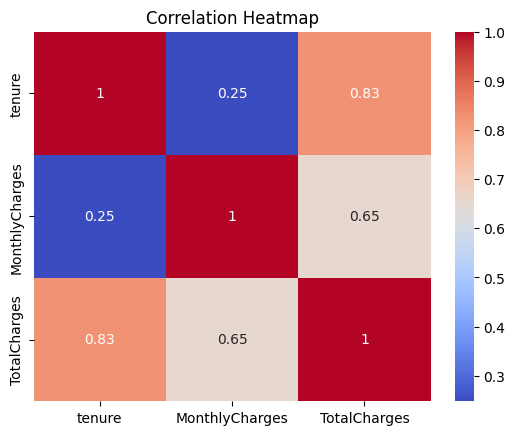

In [27]:
sns.heatmap(corr, annot= True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Conclusion

- The dataset consists of a mix of numerical and categorical features representing customer demographics, service usage, and billing information, making it suitable for a churn prediction classification problem.

- The target variable Churn shows a noticeable class imbalance, with a higher proportion of customers retained than churned, indicating the need for careful metric selection during model evaluation.

- Customers with shorter tenure are significantly more likely to churn, highlighting tenure as one of the strongest indicators of customer retention.

- MonthlyCharges tend to be higher for churned customers, suggesting that increased service costs may contribute to customer dissatisfaction and churn.

- TotalCharges is strongly correlated with tenure, reflecting accumulated billing over time; this correlation may introduce multicollinearity and should be handled cautiously during feature selection.

- Customers on month-to-month contracts exhibit substantially higher churn rates compared to those with one-year or two-year contracts, indicating that long-term contracts improve customer retention.

- PaymentMethod plays an important role in churn behavior, with customers using electronic checks showing higher churn tendencies compared to automatic payment methods.

- Customers without bundled services such as phone or internet services show different churn patterns, emphasizing the impact of service adoption on customer loyalty.

- Demographic features such as SeniorCitizen, Partner, and Dependents display meaningful variations in churn behavior, suggesting their relevance in predictive modeling.

- Overall, the exploratory analysis reveals that contract type, tenure, billing amount, and payment behavior are key drivers of customer churn and should be prioritized during feature engineering and model training.